In [53]:
# prompt: change PlayType_description to Event

# Rename the 'PlayType_description' column to 'Event'
real_df = real_df.rename(columns={'Commentary': 'Event'})

# Print the updated DataFrame0
mega_df


,Event,Commentary
0,2,"good length, 151kph, pitching outside leg, hit..."
1,2,tossed up but way wide of off and called
2,2,"spins down the leg side, signaled a wide."
3,2,low full toss at leg stump. Looks for the flic...
4,2,"length but down the leg side, starts with a wide"
...,...,...
79995,3,"back of a length, takes the thigh pad"
79996,3,"fullish and straight, seaming back in, defende..."
79997,3,shortens his length after he sees Smith coming...
79998,3,"beats the forward prod to hit the pad, sharp t..."


In [ ]:
pip install tensorflow

In [ ]:
pip install matplotlib

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt


In [77]:
real_df = pd.read_csv('base_train.csv')

In [78]:
real_df.head()

,Event,taken,pulls,length,call,quick,bowled,blocked,driven,alone,...,mid-off,full,fired,around,though,hits,worked,point,hard,review
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
real_df.describe()

,Event,taken,pulls,length,call,quick,bowled,blocked,driven,alone,...,mid-off,full,fired,around,though,hits,worked,point,hard,review
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,...,80000.000000,80000.00000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,1.750000,0.023537,0.011825,0.260675,0.042500,0.029337,0.018288,0.005812,0.018200,0.019412,...,0.022638,0.18925,0.009687,0.041662,0.020012,0.025850,0.010138,0.065275,0.021812,0.024362
std,1.479029,0.151604,0.108099,0.439006,0.201728,0.168752,0.133990,0.076018,0.133675,0.137971,...,0.148746,0.39171,0.097948,0.199818,0.140044,0.158689,0.100174,0.247012,0.146072,0.154173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.500000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [80]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample


# Separate samples by event
event_dfs = [real_df[real_df['Event'] == event] for event in real_df['Event'].unique()]

# Downsample or upsample to 5000 samples per event
resampled_dfs = [resample(event_df, replace=(len(event_df) < 5000), n_samples=5000, random_state=42) 
                 for event_df in event_dfs]

# Concatenate resampled dataframes
balanced_df = pd.concat(resampled_dfs)

# Split into features and target
y = balanced_df['Event']
X = balanced_df.drop('Event', axis=1)

In [63]:
from sklearn.decomposition import PCA
import numpy as np

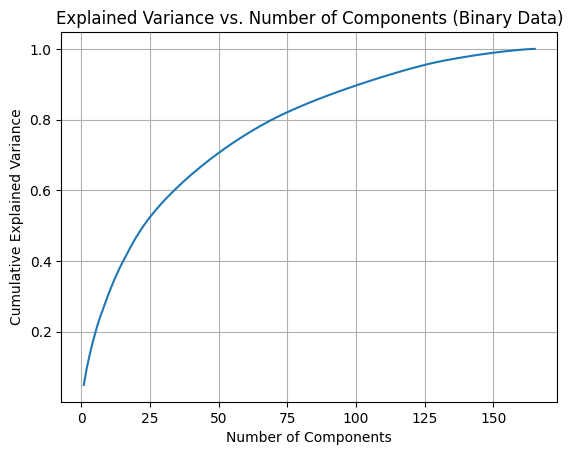

Optimal number of components: 70


In [81]:
# Assuming 'new_df' is your DataFrame and 'filtered_unique_words' is a list of binary columns

# Apply PCA without scaling
pca = PCA()
pca.fit(X)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot explained variance vs. number of components
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components (Binary Data)')
plt.grid()
plt.show()

# Choose the number of components based on desired explained variance threshold
desired_variance = 0.80  # Set your desired threshold (e.g., 95%)
n_components = next(i for i, cum_var in enumerate(cumulative_variance) if cum_var >= desired_variance) + 1

print(f"Optimal number of components: {n_components}")

In [35]:
# prompt: get top 70 important column names using pca




# Apply PCA
pca = PCA(n_components=70)  # Choose the number of components (70 in this case)
pca.fit(X)

# Get the feature importances (loadings)
feature_importances = np.abs(pca.components_)

# Calculate the average importance across all components for each feature
avg_feature_importances = np.mean(feature_importances, axis=0)

# Get the indices of the top 70 most important features
top_feature_indices = np.argsort(avg_feature_importances)[::-1][:70]

# Get the names of the top 70 most important features
top_feature_names = [X.columns[i] for i in top_feature_indices]

print("Top 70 important column names:")
print(top_feature_names)


Top 70 important column names:
['point', 'pull', 'deep', 'good', 'cut', 'fine', 'goes', 'stumps', 'line', 'across', 'outside', 'square', 'top', 'pitch', 'forward', 'bat', 'edge', 'sweep', 'short', "'s", 'flick', 'hit', 'looks', 'drive', 'middle', 'side', 'around', 'towards', 'shot', 'stump', 'turn', 'left', 'misses', 'delivery', 'length', 'high', 'foot', 'straight', 'full', 'pad', 'cover', 'leg', 'front', 'past', 'man', 'catch', 'right', 'time', 'back', 'keeper', 'one', 'well', 'call', 'ca', 'long', 'air', 'bounce', 'take', 'another', 'ends', 'slip', 'inside', 'go', 'wicket', 'toss', 'behind', 'third', 'end', 'defend', 'kph']


In [82]:
# Get the names of the top 70 most important features
top_feature_names = [X.columns[i] for i in top_feature_indices]

print("Top 70 important column names:")
print(top_feature_names)


Top 70 important column names:
['point', 'pull', 'deep', 'good', 'cut', 'fine', 'goes', 'stumps', 'line', 'across', 'outside', 'square', 'top', 'pitch', 'forward', 'bat', 'edge', 'sweep', 'short', "'s", 'flick', 'hit', 'looks', 'drive', 'middle', 'side', 'around', 'towards', 'shot', 'stump', 'turn', 'left', 'misses', 'delivery', 'length', 'high', 'foot', 'straight', 'full', 'pad', 'cover', 'leg', 'front', 'past', 'man', 'catch', 'right', 'time', 'back', 'keeper', 'one', 'well', 'call', 'ca', 'long', 'air', 'bounce', 'take', 'another', 'ends', 'slip', 'inside', 'go', 'wicket', 'toss', 'behind', 'third', 'end', 'defend', 'kph']


In [83]:
# prompt: now only keep the columns in top_feature_names and drop rest in new_df

# Keep only the columns in top_feature_names and drop the rest
real_df = balanced_df[['Event'] + top_feature_names]

# Print the updated DataFrame
real_df


,Event,point,pull,deep,good,cut,fine,goes,stumps,line,...,slip,inside,go,wicket,toss,behind,third,end,defend,kph
10650,2,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2041,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8668,2,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1114,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13902,2,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63761,4,0,0,0,0,0,0,1,1,0,...,0,0,1,0,0,0,0,1,1,0
65478,4,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
65805,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
70084,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
print(real_df.columns)

Index(['Event', 'point', 'pull', 'deep', 'good', 'cut', 'fine', 'goes',
       'stumps', 'line', 'across', 'outside', 'square', 'top', 'pitch',
       'forward', 'bat', 'edge', 'sweep', 'short', ''s', 'flick', 'hit',
       'looks', 'drive', 'middle', 'side', 'around', 'towards', 'shot',
       'stump', 'turn', 'left', 'misses', 'delivery', 'length', 'high', 'foot',
       'straight', 'full', 'pad', 'cover', 'leg', 'front', 'past', 'man',
       'catch', 'right', 'time', 'back', 'keeper', 'one', 'well', 'call', 'ca',
       'long', 'air', 'bounce', 'take', 'another', 'ends', 'slip', 'inside',
       'go', 'wicket', 'toss', 'behind', 'third', 'end', 'defend', 'kph'],
      dtype='object')


In [93]:
y = real_df['Event']
X = real_df.drop('Event', axis=1)

In [94]:
y.unique()

array([2, 0, 1, 4])

In [95]:
y.replace(4,3,inplace=True)

/var/folders/9q/ftjfwhn958sgctkd6pctp58h0000gn/T/ipykernel_1625/1050678180.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.replace(4,3,inplace=True)


In [96]:
len(y)

20000

In [98]:
real_df.shape[0]

20000

In [49]:
from sklearn.metrics import f1_score

Epoch 1/103
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - accuracy: 0.2469 - loss: 1.3954 - val_accuracy: 0.2700 - val_loss: 1.3828
Epoch 2/103
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step - accuracy: 0.2912 - loss: 1.3790 - val_accuracy: 0.3300 - val_loss: 1.3745
Epoch 3/103
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step - accuracy: 0.2927 - loss: 1.3736 - val_accuracy: 0.3800 - val_loss: 1.3535
Epoch 4/103
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step - accuracy: 0.3298 - loss: 1.3595 - val_accuracy: 0.4117 - val_loss: 1.3075
Epoch 5/103
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step - accuracy: 0.3495 - loss: 1.3076 - val_accuracy: 0.4400 - val_loss: 1.2336
Epoch 6/103
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step - accuracy: 0.3914 - loss: 1.2721 - val_accuracy: 0.4500 - val_loss: 1.1903
Epoch 7/103
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step - accuracy: 0.3942 - loss: 1.2564 - val_accuracy: 0.4500 - val_loss: 1.1572
Epoch 8/103
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step - accuracy: 0.4166 - loss: 1

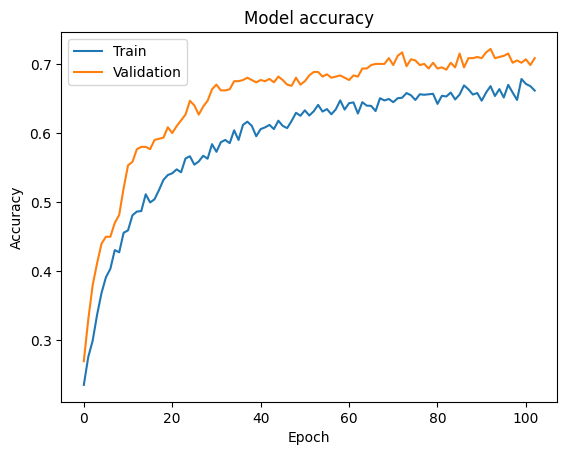

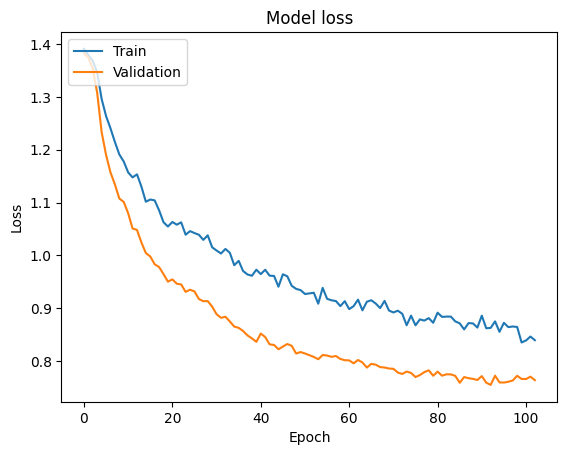

In [353]:
# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=50)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=50)




# Define the neural network model
model = keras.Sequential([
    layers.Dropout(0.2),
    layers.Dense(45, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(23, activation='relu'),
          layers.Dropout(0.2),
          layers.Dense(15, activation='relu'),
          layers.Dropout(0.1),
          layers.Dense(8, activation='relu'),
          layers.Dropout(0.1),
    layers.Dense(4, activation='softmax')
])

# Compile the model
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001)

# Train the model
history = model.fit(X_train, y_train, epochs=103, batch_size=8,
                    validation_data=(X_val, y_val),
                    #callbacks=[early_stopping, lr_reduction]
)
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

# Get predictions
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1}")


# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [89]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming X and y are defined

# Apply PCA to reduce to 2 components
pca = PCA(n_components=70)
X_pca = pca.fit_transform(X)

# Define colors for each category
colors = ['red', 'green', 'blue', 'purple']  # Customize colors as desired



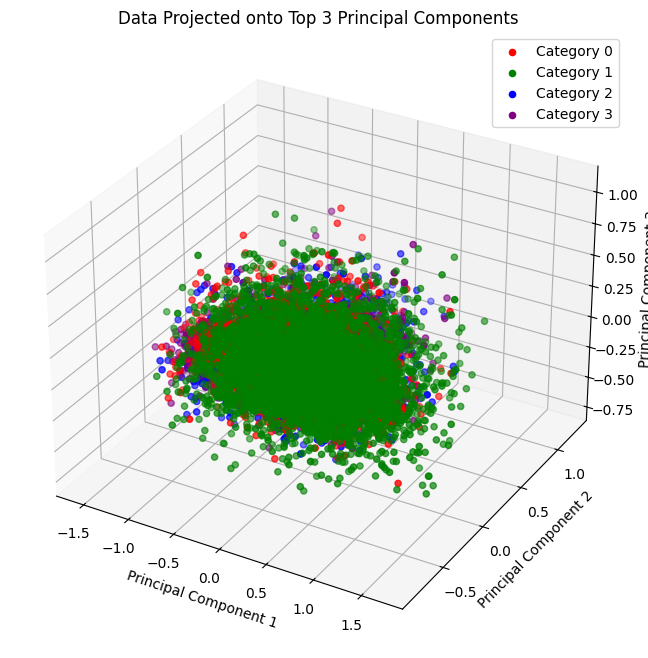

In [94]:


# Define colors for each category
colors = ['red', 'green', 'blue', 'purple']

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for category in range(4):
    category_indices = y == category
    ax.scatter(X_pca[category_indices, 6], X_pca[category_indices,55], X_pca[category_indices, 69],
               c=colors[category], label=f'Category {category}')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('Data Projected onto Top 3 Principal Components')
ax.legend()

plt.show()

Epoch 1/60
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - accuracy: 0.2952 - loss: 1.3740 - val_accuracy: 0.4250 - val_loss: 1.3053 - learning_rate: 0.0010
Epoch 2/60
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - accuracy: 0.3666 - loss: 1.3109 - val_accuracy: 0.4617 - val_loss: 1.1945 - learning_rate: 0.0010
Epoch 3/60
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - accuracy: 0.4133 - loss: 1.2674 - val_accuracy: 0.5450 - val_loss: 1.1125 - learning_rate: 0.0010
Epoch 4/60
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - accuracy: 0.4874 - loss: 1.1824 - val_accuracy: 0.6050 - val_loss: 1.0279 - learning_rate: 0.0010
Epoch 5/60
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - accuracy: 0.5343 - loss: 1.1087 - val_accuracy: 0.6250 - val_loss: 0.9596 - learning_rate: 0.0010
Epoch 6/60
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - accuracy: 0.5357 - loss: 1.0978 - val_accuracy: 0.6450 - val_loss: 0.9292 - learning_rate: 0.0010
Epoch 7/60
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - accuracy: 0.5587 - loss: 1.0656 - 

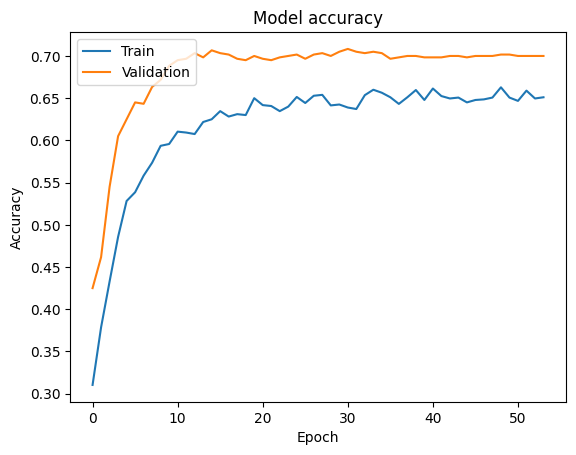

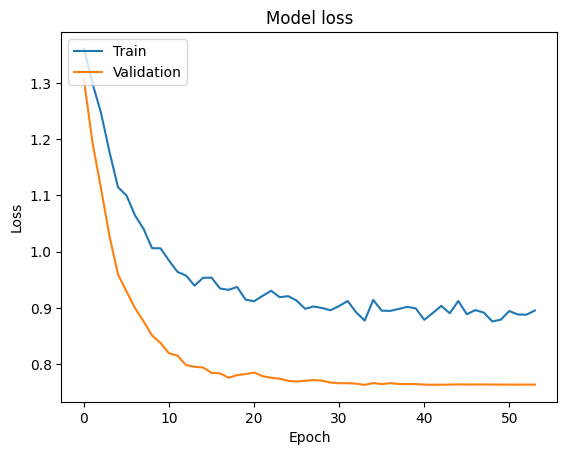

In [376]:
# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=50)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=50)




# Define the neural network model
model = keras.Sequential([
    layers.Dropout(0.2),
    layers.Dense(45, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(23, activation='relu'),
          layers.Dropout(0.2),
          layers.Dense(15, activation='relu'),
          layers.Dropout(0.1),
          layers.Dense(8, activation='relu'),
          layers.Dropout(0.1),
    layers.Dense(4, activation='softmax')
])

# Compile the model
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001)

# Train the model
history = model.fit(X_train, y_train, epochs=60, batch_size=30,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping, lr_reduction]
)
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

# Get predictions
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1}")


# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 653us/step - accuracy: 0.3444 - loss: 1.3631 - val_accuracy: 0.5635 - val_loss: 1.1919
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step - accuracy: 0.5953 - loss: 1.1033 - val_accuracy: 0.6855 - val_loss: 0.8989
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - accuracy: 0.6726 - loss: 0.8701 - val_accuracy: 0.7030 - val_loss: 0.8081
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step - accuracy: 0.6877 - loss: 0.7941 - val_accuracy: 0.7070 - val_loss: 0.7763
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step - accuracy: 0.7125 - loss: 0.7437 - val_accuracy: 0.7160 - val_loss: 0.7595
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - accuracy: 0.7118 - loss: 0.7324 - val_accuracy: 0.7175 - val_loss: 0.7486
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - accuracy: 0.7209 - loss: 0.7221 - val_accuracy: 0.7190 - val_loss: 0.7439
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - accuracy: 0.7195 - loss: 0.7177 - val_accurac

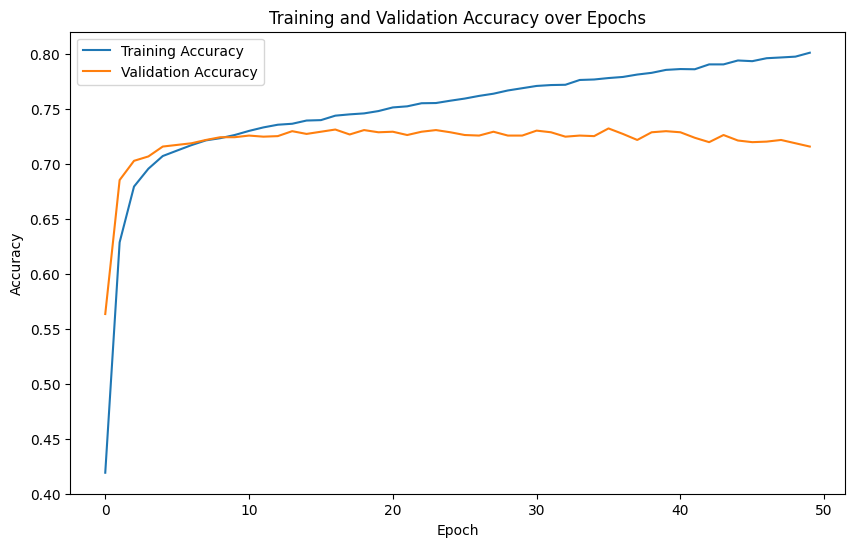

Test Set Accuracy: 0.7285


In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# # Load the dataset
# data = pd.read_csv('base_train.csv')

# # Extract the features (x columns) and the target (y column)
# X = data.drop(columns=['Event']).values  # Assuming all columns except 'y' are features
# y = data['Event'].values  # This is the target column

# Encode the target variable (y) to ensure it's numeric
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape X for LSTM input: [samples, timesteps, features]
# Assuming each row is a timestep in a sequence
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X_reshaped, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Further split the temporary set into validation (50% of the temporary set) and testing (50%)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Build the LSTM model
model = Sequential()
model.add(LSTM(69, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu'))
model.add(Dense(45, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(len(np.unique(y_encoded)), activation='softmax'))  # Output layer for classification

# Compile the model
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=50, batch_size=32, verbose=1)

# Plot training & validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.legend()
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Set Accuracy: {test_accuracy:.4f}")


Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4000/4000 ━━━━━━━━━━━━━━━━━━━━ 2s 465us/step - accuracy: 0.4288 - loss: 1.2219 - val_accuracy: 0.7207 - val_loss: 0.7555
Epoch 2/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 2s 436us/step - accuracy: 0.6975 - loss: 0.7899 - val_accuracy: 0.7445 - val_loss: 0.6894
Epoch 3/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 2s 421us/step - accuracy: 0.7306 - loss: 0.7303 - val_accuracy: 0.7531 - val_loss: 0.6810
Epoch 4/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 2s 415us/step - accuracy: 0.7377 - loss: 0.7277 - val_accuracy: 0.7577 - val_loss: 0.6775
Epoch 5/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 2s 428us/step - accuracy: 0.7504 - loss: 0.7079 - val_accuracy: 0.7595 - val_loss: 0.6750
Epoch 6/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 2s 423us/step - accuracy: 0.7510 - loss: 0.7089 - val_accuracy: 0.7628 - val_loss: 0.6718
Epoch 7/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 2s 419us/step - accuracy: 0.7565 - loss: 0.6985 - val_accuracy: 0.7629 - val_loss: 0.6695
Epoch 8/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 2s 416us/step - accuracy: 0.7585 - loss: 0.68

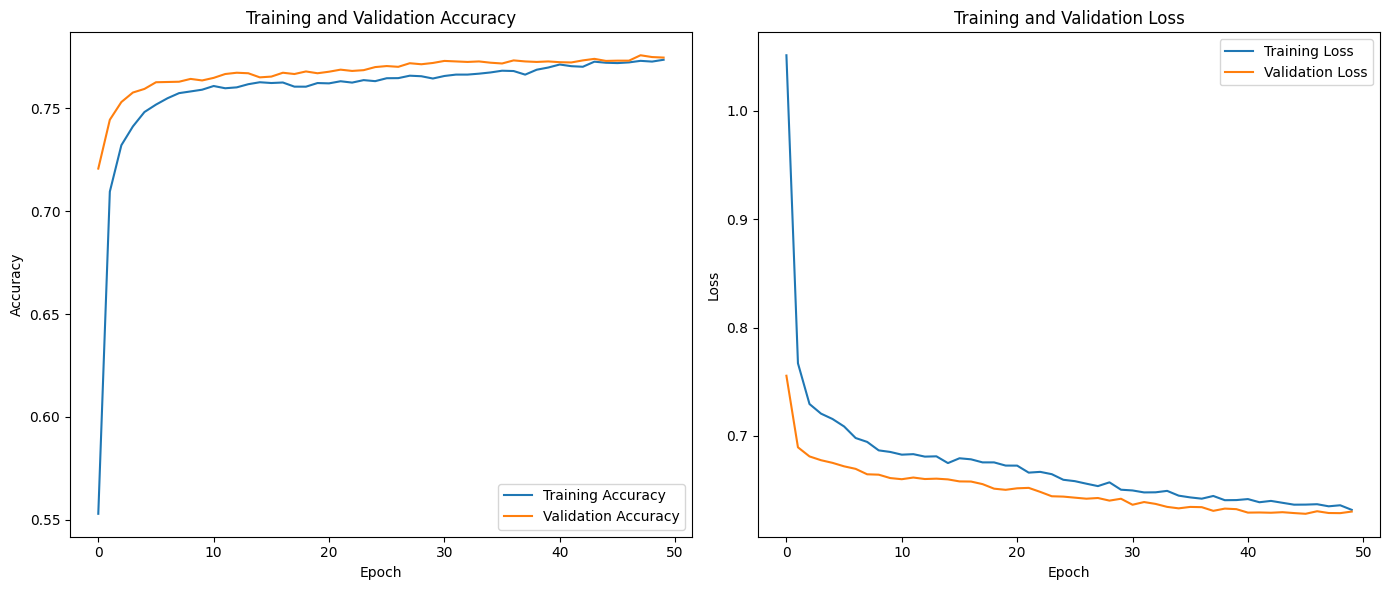

Test Set Accuracy: 0.7751
Test Set Loss: 0.6357


In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('base_train.csv')  # Replace with the correct path to your file

# Extract the features (x columns) and the target (y column)
X = data.drop(columns=['Event']).values  # Assuming all columns except 'y' are features
y = data['Event'].values  # This is the target column

# Encode the target variable (y) to ensure it's numeric
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape X for LSTM input: [samples, timesteps, features]
# Assuming each row is a timestep in a sequence
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X_reshaped, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Further split the temporary set into validation (50% of the temporary set) and testing (50%)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Build the LSTM model with Dropout and RMSprop optimizer
model = Sequential()
model.add(LSTM(54, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu'))
model.add(Dropout(0.2))  # Dropout layer to reduce overfitting
model.add(Dense(15, activation='relu'))
model.add(Dropout(0.2))  # Additional dropout layer
model.add(Dense(len(np.unique(y_encoded)), activation='softmax'))  # Output layer for classification

# Compile the model with RMSprop optimizer
optimizer = RMSprop(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=50, batch_size=16, verbose=1)

# Plotting training & validation accuracy
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plotting training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Set Accuracy: {test_accuracy:.4f}")
print(f"Test Set Loss: {test_loss:.4f}")


Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 2s 575us/step - accuracy: 0.3650 - loss: 1.3034 - val_accuracy: 0.6731 - val_loss: 0.9360
Epoch 2/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 510us/step - accuracy: 0.6400 - loss: 0.9171 - val_accuracy: 0.7333 - val_loss: 0.7274
Epoch 3/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 557us/step - accuracy: 0.6978 - loss: 0.8008 - val_accuracy: 0.7490 - val_loss: 0.6876
Epoch 4/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 537us/step - accuracy: 0.7242 - loss: 0.7497 - val_accuracy: 0.7560 - val_loss: 0.6700
Epoch 5/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 536us/step - accuracy: 0.7338 - loss: 0.7288 - val_accuracy: 0.7584 - val_loss: 0.6602
Epoch 6/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 570us/step - accuracy: 0.7405 - loss: 0.7165 - val_accuracy: 0.7604 - val_loss: 0.6538
Epoch 7/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 535us/step - accuracy: 0.7465 - loss: 0.7033 - val_accuracy: 0.7631 - val_loss: 0.6485
Epoch 8/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 545us/step - accuracy: 0.7521 - loss: 0.69

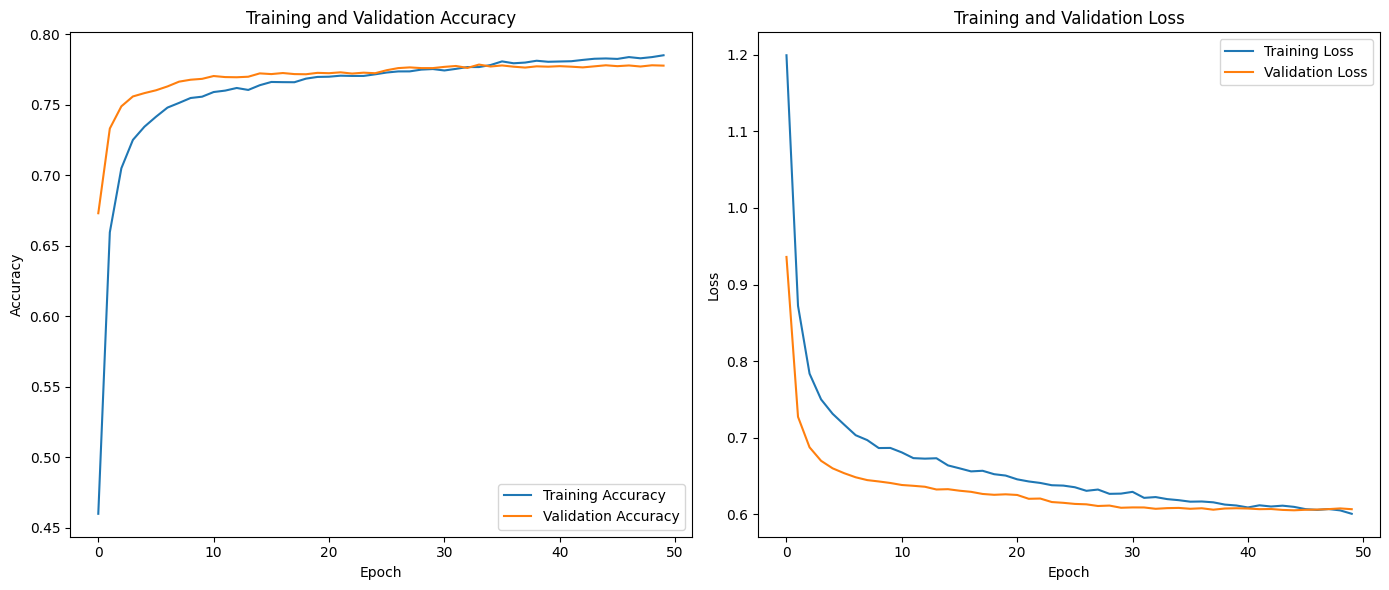

Test Set Accuracy: 0.7775
Test Set Loss: 0.6072


In [110]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('base_train.csv')  # Replace with the correct path to your file

# Extract the features (x columns) and the target (y column)
X = data.drop(columns=['Event']).values  # Assuming all columns except 'y' are features
y = data['Event'].values  # This is the target column

# Encode the target variable (y) to ensure it's numeric
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape X for LSTM input: [samples, timesteps, features]
# Assuming each row is a timestep in a sequence
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X_reshaped, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Further split the temporary set into validation (50% of the temporary set) and testing (50%)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Build the LSTM model with Dropout and RMSprop optimizer
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu'))
model.add(Dropout(0.2))  # Dropout layer to reduce overfitting
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))  # Additional dropout layer
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))  # Additional dropout layer
model.add(Dense(len(np.unique(y_encoded)), activation='softmax'))  # Output layer for classification

# Compile the model with RMSprop optimizer
optimizer = RMSprop(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=50, batch_size=32, verbose=1)

# Plotting training & validation accuracy
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plotting training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Set Accuracy: {test_accuracy:.4f}")
print(f"Test Set Loss: {test_loss:.4f}")


Epoch 1/55


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 546us/step - accuracy: 0.3081 - loss: 1.3494 - val_accuracy: 0.5150 - val_loss: 1.2217
Epoch 2/55
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - accuracy: 0.4721 - loss: 1.2099 - val_accuracy: 0.6195 - val_loss: 1.0866
Epoch 3/55
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step - accuracy: 0.5659 - loss: 1.0808 - val_accuracy: 0.6800 - val_loss: 0.9401
Epoch 4/55
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - accuracy: 0.6128 - loss: 0.9787 - val_accuracy: 0.7065 - val_loss: 0.8303
Epoch 5/55
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - accuracy: 0.6463 - loss: 0.8931 - val_accuracy: 0.7105 - val_loss: 0.7949
Epoch 6/55
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - accuracy: 0.6549 - loss: 0.8744 - val_accuracy: 0.7160 - val_loss: 0.7755
Epoch 7/55
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - accuracy: 0.6664 - loss: 0.8503 - val_accuracy: 0.7150 - val_loss: 0.7651
Epoch 8/55
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - accuracy: 0.6800 - loss: 0.83

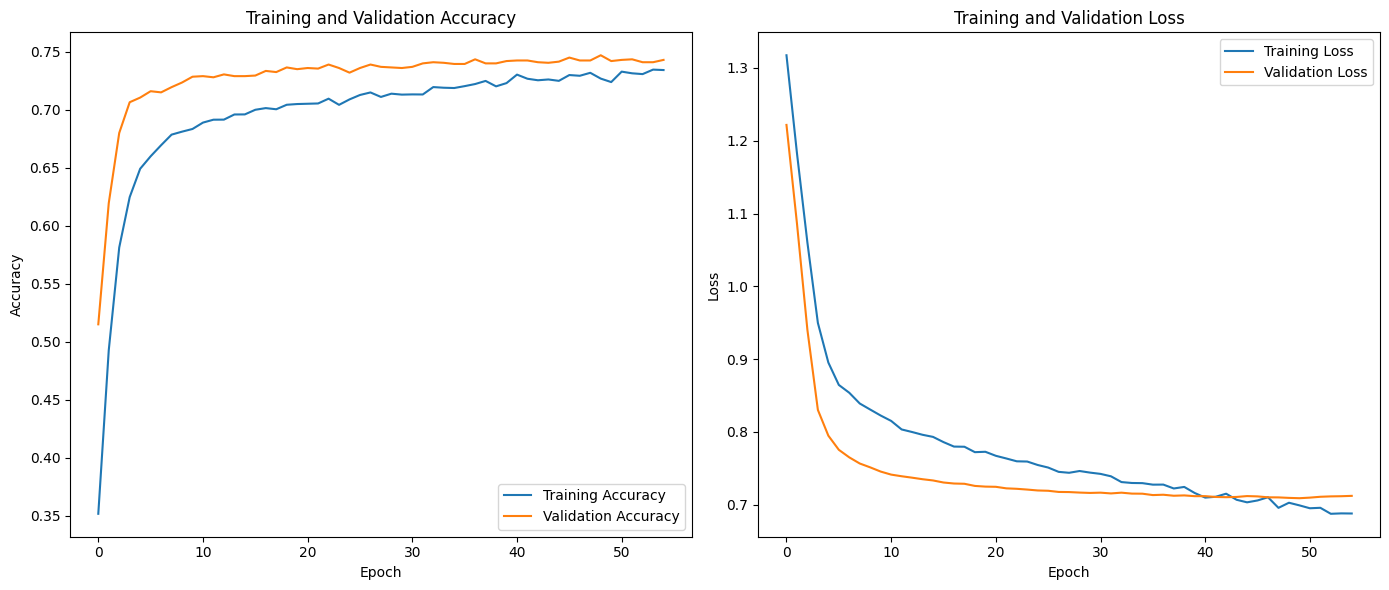

Test Set Accuracy: 0.7580
Test Set Loss: 0.6618


In [127]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt

# Load the dataset
data = real_df  # Replace with the correct path to your file

# Extract the features (x columns) and the target (y column)
X = data.drop(columns=['Event']).values  # Assuming all columns except 'y' are features
y = data['Event'].values  # This is the target column

# Encode the target variable (y) to ensure it's numeric
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape X for LSTM input: [samples, timesteps, features]
# Assuming each row is a timestep in a sequence
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X_reshaped, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Further split the temporary set into validation (50% of the temporary set) and testing (50%)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Build the LSTM model with Dropout and RMSprop optimizer
model = Sequential()
model.add(LSTM(59, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu'))
model.add(Dropout(0.3))  # Dropout layer to reduce overfitting
model.add(Dense(23, activation='relu'))
model.add(Dropout(0.2))  # Additional dropout layer
model.add(Dense(15, activation='relu'))
model.add(Dropout(0.1))  # Additional dropout layer
model.add(Dense(len(np.unique(y_encoded)), activation='softmax'))  # Output layer for classification

# Compile the model with RMSprop optimizer
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=55, batch_size=16, verbose=1)

# Plotting training & validation accuracy
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plotting training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Set Accuracy: {test_accuracy:.4f}")
print(f"Test Set Loss: {test_loss:.4f}")


In [107]:
X_train.


IndexError: tuple index out of range

Epoch 1/175


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 710us/step - accuracy: 0.2787 - loss: 1.3842 - val_accuracy: 0.4385 - val_loss: 1.3327
Epoch 2/175
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - accuracy: 0.3971 - loss: 1.3324 - val_accuracy: 0.5720 - val_loss: 1.2350
Epoch 3/175
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - accuracy: 0.5065 - loss: 1.2301 - val_accuracy: 0.6420 - val_loss: 1.0869
Epoch 4/175
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step - accuracy: 0.5776 - loss: 1.1045 - val_accuracy: 0.6775 - val_loss: 0.9412
Epoch 5/175
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - accuracy: 0.6070 - loss: 0.9959 - val_accuracy: 0.6945 - val_loss: 0.8614
Epoch 6/175
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - accuracy: 0.6280 - loss: 0.9415 - val_accuracy: 0.7045 - val_loss: 0.8246
Epoch 7/175
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - accuracy: 0.6439 - loss: 0.8981 - val_accuracy: 0.7095 - val_loss: 0.8060
Epoch 8/175
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step - accuracy: 0.6593 - loss: 0.8847 - val_

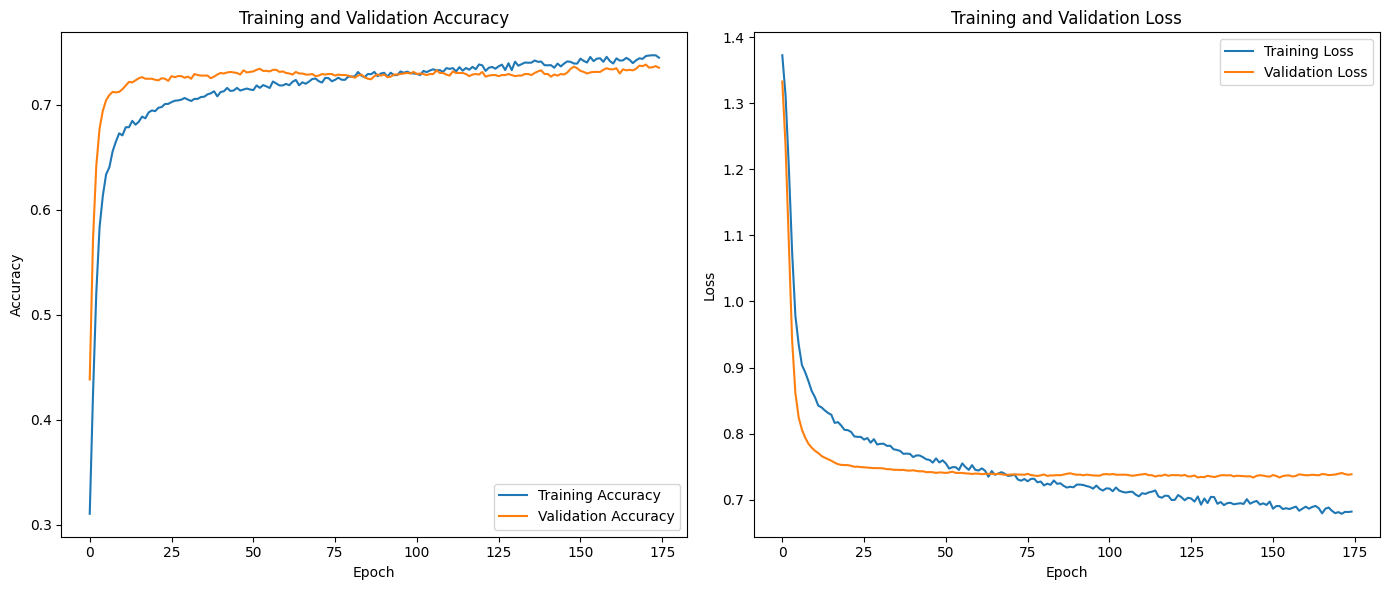

Test Set Accuracy: 0.7575
Test Set Loss: 0.6796


In [134]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt

# Load the dataset
data = real_df  # Replace with the correct path to your file

# Extract the features (x columns) and the target (y column)
X = data.drop(columns=['Event']).values  # Assuming all columns except 'y' are features
y = data['Event'].values  # This is the target column

# Encode the target variable (y) to ensure it's numeric
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape X for LSTM input: [samples, timesteps, features]
# Assuming each row is a timestep in a sequence
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X_reshaped, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Further split the temporary set into validation (50% of the temporary set) and testing (50%)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Build the LSTM model with Dropout and RMSprop optimizer
model = Sequential()
model.add(LSTM(59, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu'))
model.add(Dropout(0.3))  # Dropout layer to reduce overfitting
model.add(Dense(23, activation='relu'))
model.add(Dropout(0.2))  # Additional dropout layer
model.add(Dense(15, activation='relu'))
model.add(Dropout(0.1))  # Additional dropout layer
model.add(Dense(len(np.unique(y_encoded)), activation='softmax'))  # Output layer for classification

# Compile the model with RMSprop optimizer
optimizer = RMSprop(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=175, batch_size=32, verbose=1)

# Plotting training & validation accuracy
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plotting training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Set Accuracy: {test_accuracy:.4f}")
print(f"Test Set Loss: {test_loss:.4f}")


Epoch 1/73


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 562us/step - accuracy: 0.3106 - loss: 1.3677 - val_accuracy: 0.5595 - val_loss: 1.2183
Epoch 2/73
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - accuracy: 0.5435 - loss: 1.1883 - val_accuracy: 0.6605 - val_loss: 1.0363
Epoch 3/73
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - accuracy: 0.6355 - loss: 1.0248 - val_accuracy: 0.6830 - val_loss: 0.9014
Epoch 4/73
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step - accuracy: 0.6668 - loss: 0.9069 - val_accuracy: 0.6945 - val_loss: 0.8247
Epoch 5/73
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - accuracy: 0.6743 - loss: 0.8464 - val_accuracy: 0.7090 - val_loss: 0.7843
Epoch 6/73
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step - accuracy: 0.6852 - loss: 0.8089 - val_accuracy: 0.7125 - val_loss: 0.7630
Epoch 7/73
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step - accuracy: 0.6964 - loss: 0.7880 - val_accuracy: 0.7185 - val_loss: 0.7506
Epoch 8/73
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - accuracy: 0.6922 - loss: 0.7845 - val_accurac

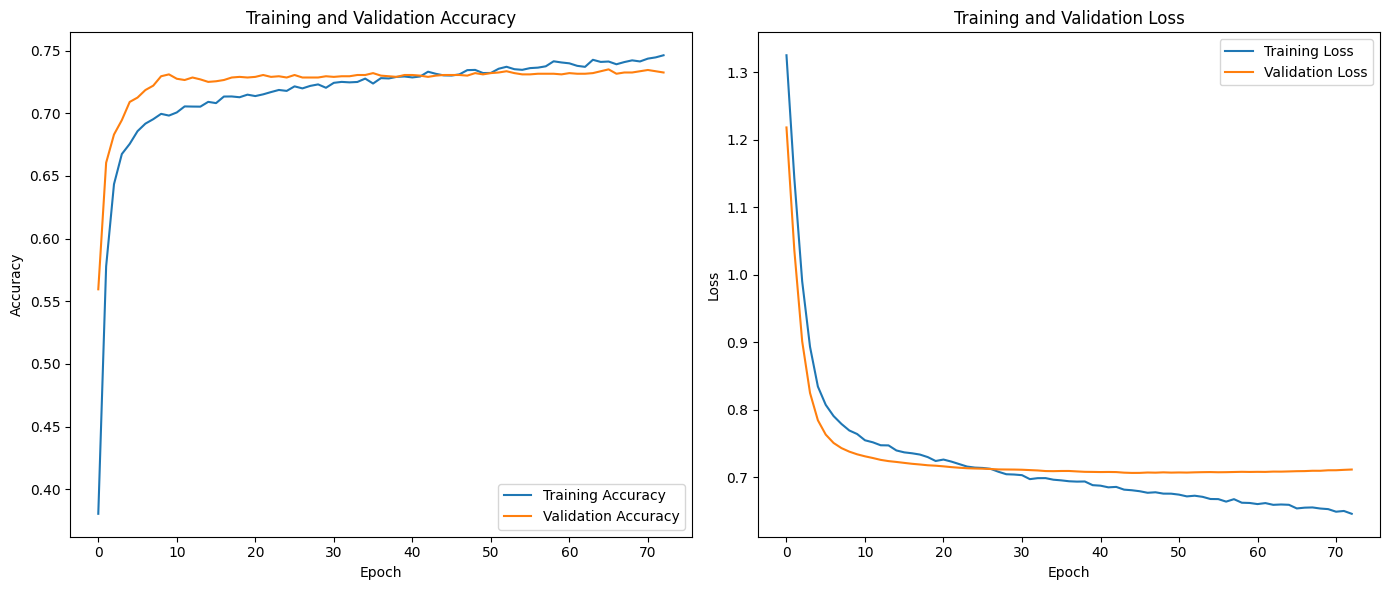

Test Set Accuracy: 0.7605
Test Set Loss: 0.6568


In [147]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt

# Load the dataset
data = real_df  # Replace with the correct path to your file

# Extract the features (x columns) and the target (y column)
X = data.drop(columns=['Event']).values  # Assuming all columns except 'y' are features
y = data['Event'].values  # This is the target column

# Encode the target variable (y) to ensure it's numeric
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape X for LSTM input: [samples, timesteps, features]
# Assuming each row is a timestep in a sequence
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X_reshaped, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Further split the temporary set into validation (50% of the temporary set) and testing (50%)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Build the LSTM model with Dropout and RMSprop optimizer
model = Sequential()
model.add(LSTM(45, input_shape=(X_train.shape[1], X_train.shape[2]), activation='tanh'))
model.add(Dropout(0.2))  # Dropout layer to reduce overfitting
# model.add(Dense(23, activation='tanh'))
# model.add(Dropout(0.2))  # Additional dropout layer
model.add(Dense(15, activation='tanh'))
model.add(Dropout(0.1))  # Additional dropout layer
model.add(Dense(len(np.unique(y_encoded)), activation='softmax'))  # Output layer for classification

# Compile the model with RMSprop optimizer
optimizer = RMSprop(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=73, batch_size=32, verbose=1)

# Plotting training & validation accuracy
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plotting training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Set Accuracy: {test_accuracy:.4f}")
print(f"Test Set Loss: {test_loss:.4f}")


Epoch 1/28


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 652us/step - accuracy: 0.3377 - loss: 1.3466 - val_accuracy: 0.6060 - val_loss: 1.1594
Epoch 2/28
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step - accuracy: 0.5869 - loss: 1.1197 - val_accuracy: 0.6755 - val_loss: 0.9676
Epoch 3/28
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - accuracy: 0.6507 - loss: 0.9598 - val_accuracy: 0.6975 - val_loss: 0.8559
Epoch 4/28
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - accuracy: 0.6812 - loss: 0.8655 - val_accuracy: 0.7125 - val_loss: 0.7992
Epoch 5/28
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step - accuracy: 0.6806 - loss: 0.8179 - val_accuracy: 0.7185 - val_loss: 0.7708
Epoch 6/28
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - accuracy: 0.6948 - loss: 0.7941 - val_accuracy: 0.7225 - val_loss: 0.7551
Epoch 7/28
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - accuracy: 0.7021 - loss: 0.7683 - val_accuracy: 0.7230 - val_loss: 0.7450
Epoch 8/28
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - accuracy: 0.6994 - loss: 0.7703 - val_accurac

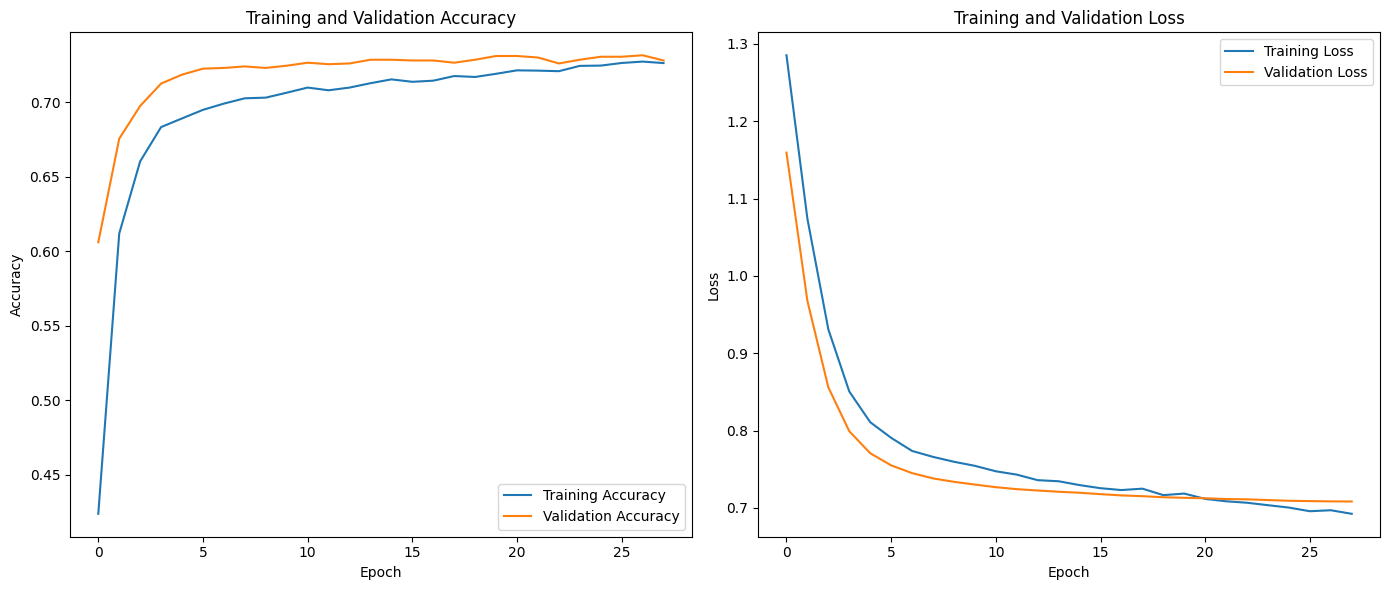

Test Set Accuracy: 0.7510
Test Set Loss: 0.6587


In [168]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt

# Load the dataset
data = real_df  # Replace with the correct path to your file

# Extract the features (x columns) and the target (y column)
X = data.drop(columns=['Event']).values  # Assuming all columns except 'y' are features
y = data['Event'].values  # This is the target column

# Encode the target variable (y) to ensure it's numeric
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape X for LSTM input: [samples, timesteps, features]
# Assuming each row is a timestep in a sequence
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X_reshaped, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Further split the temporary set into validation (50% of the temporary set) and testing (50%)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Build the LSTM model with Dropout and RMSprop optimizer
model = Sequential()
model.add(LSTM(45, input_shape=(X_train.shape[1], X_train.shape[2]), activation='tanh'))
model.add(Dropout(0.2))  # Dropout layer to reduce overfitting
# model.add(Dense(23, activation='tanh'))
# model.add(Dropout(0.2))  # Additional dropout layer
model.add(Dense(15, activation='tanh'))
model.add(Dropout(0.1))  # Additional dropout layer
model.add(Dense(len(np.unique(y_encoded)), activation='softmax'))  # Output layer for classification

# Compile the model with RMSprop optimizer
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=28, batch_size=32, verbose=1)

# Plotting training & validation accuracy
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plotting training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Set Accuracy: {test_accuracy:.4f}")
print(f"Test Set Loss: {test_loss:.4f}")


Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 565us/step - accuracy: 0.3156 - loss: 1.3568 - val_accuracy: 0.5700 - val_loss: 1.2019
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - accuracy: 0.5373 - loss: 1.1810 - val_accuracy: 0.6545 - val_loss: 1.0304
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - accuracy: 0.6197 - loss: 1.0281 - val_accuracy: 0.6815 - val_loss: 0.9068
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step - accuracy: 0.6524 - loss: 0.9202 - val_accuracy: 0.6950 - val_loss: 0.8323
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - accuracy: 0.6759 - loss: 0.8651 - val_accuracy: 0.7030 - val_loss: 0.7923
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step - accuracy: 0.6789 - loss: 0.8280 - val_accuracy: 0.7050 - val_loss: 0.7699
Epoch 7/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step - accuracy: 0.6847 - loss: 0.8013 - val_accuracy: 0.7110 - val_loss: 0.7567
Epoch 8/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step - accuracy: 0.6982 - loss: 0.7807 - val_

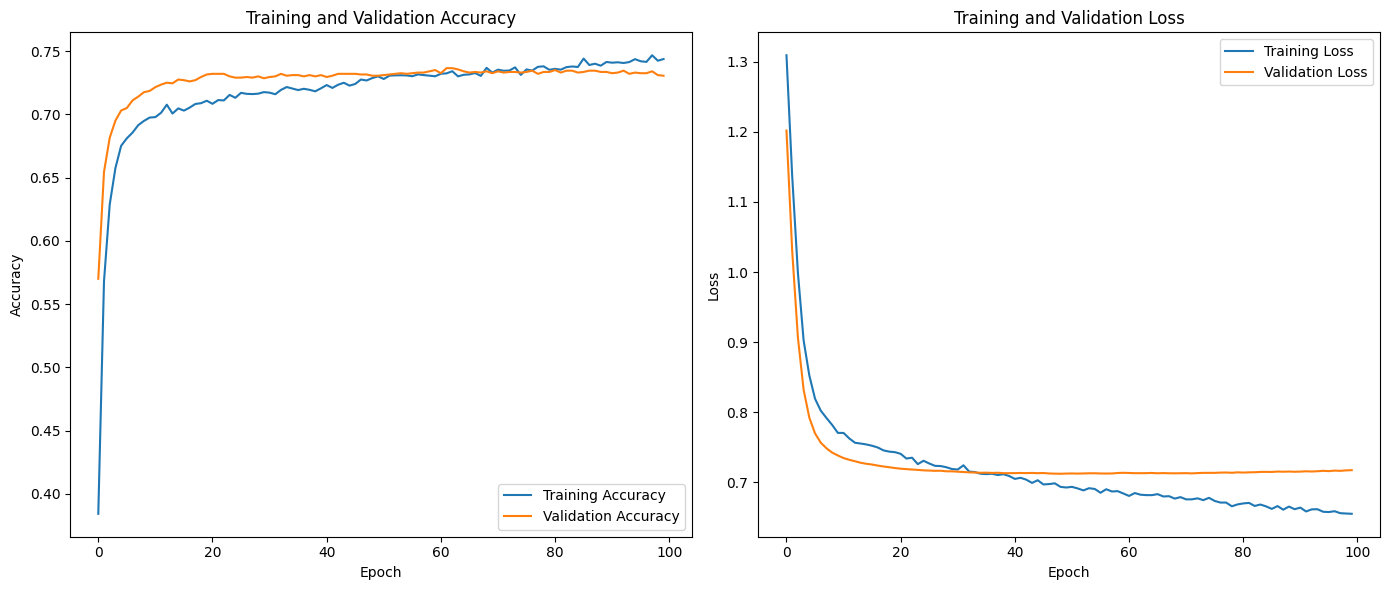

Test Set Accuracy: 0.7665
Test Set Loss: 0.6653


In [178]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt

# Load the dataset
data = real_df  # Replace with the correct path to your file

# Extract the features (x columns) and the target (y column)
X = data.drop(columns=['Event']).values  # Assuming all columns except 'y' are features
y = data['Event'].values  # This is the target column

# Encode the target variable (y) to ensure it's numeric
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape X for LSTM input: [samples, timesteps, features]
# Assuming each row is a timestep in a sequence
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X_reshaped, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Further split the temporary set into validation (50% of the temporary set) and testing (50%)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Build the LSTM model with Dropout and RMSprop optimizer
model = Sequential()
model.add(LSTM(45, input_shape=(X_train.shape[1], X_train.shape[2]), activation='tanh'))
model.add(Dropout(0.3))  # Dropout layer to reduce overfitting
# model.add(Dense(23, activation='tanh'))
# model.add(Dropout(0.2))  # Additional dropout layer
model.add(Dense(15, activation='tanh'))
model.add(Dropout(0.1))  # Additional dropout layer
model.add(Dense(len(np.unique(y_encoded)), activation='softmax'))  # Output layer for classification

# Compile the model with RMSprop optimizer
optimizer = RMSprop(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=100, batch_size=32, verbose=1)

# Plotting training & validation accuracy
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plotting training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Set Accuracy: {test_accuracy:.4f}")
print(f"Test Set Loss: {test_loss:.4f}")


Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 2s 509us/step - accuracy: 0.4438 - loss: 1.2350 - val_accuracy: 0.7094 - val_loss: 0.8058
Epoch 2/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 476us/step - accuracy: 0.6649 - loss: 0.8564 - val_accuracy: 0.7352 - val_loss: 0.6938
Epoch 3/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 474us/step - accuracy: 0.6857 - loss: 0.7941 - val_accuracy: 0.7481 - val_loss: 0.6646
Epoch 4/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 476us/step - accuracy: 0.6922 - loss: 0.7739 - val_accuracy: 0.7529 - val_loss: 0.6521
Epoch 5/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 482us/step - accuracy: 0.6967 - loss: 0.7622 - val_accuracy: 0.7573 - val_loss: 0.6454
Epoch 6/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 471us/step - accuracy: 0.7020 - loss: 0.7552 - val_accuracy: 0.7606 - val_loss: 0.6411
Epoch 7/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 470us/step - accuracy: 0.7018 - loss: 0.7536 - val_accuracy: 0.7620 - val_loss: 0.6380
Epoch 8/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 464us/step - accuracy: 0.7048 - los

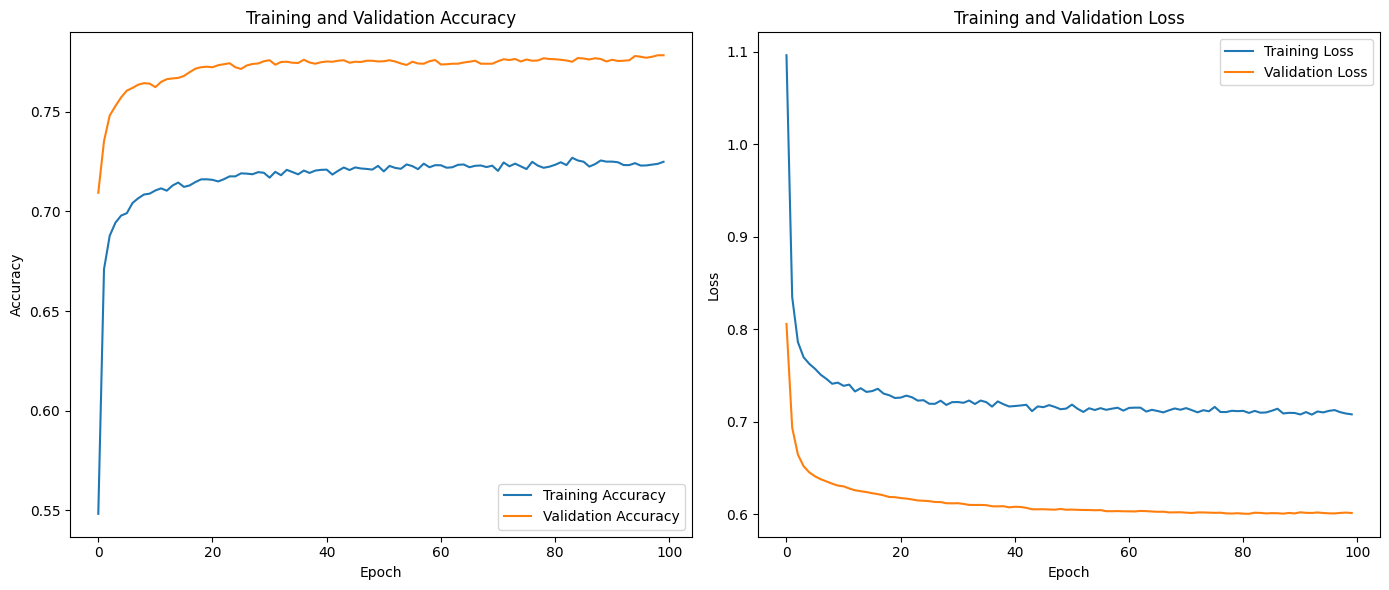

Test Set Accuracy: 0.7744
Test Set Loss: 0.5952


In [195]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('base_train.csv')  # Replace with the correct path to your file

# Extract the features (x columns) and the target (y column)
X = data.drop(columns=['Event']).values  # Assuming all columns except 'y' are features
y = data['Event'].values  # This is the target column

# Encode the target variable (y) to ensure it's numeric
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape X for LSTM input: [samples, timesteps, features]
# Assuming each row is a timestep in a sequence
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X_reshaped, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Further split the temporary set into validation (50% of the temporary set) and testing (50%)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Build the LSTM model with Dropout and RMSprop optimizer
model = Sequential()
model.add(Dropout(0.3))
model.add(LSTM(47, input_shape=(X_train.shape[1], X_train.shape[2]), activation='tanh'))
model.add(Dropout(0.2))  # Dropout layer to reduce overfitting
# model.add(Dense(23, activation='tanh'))
# model.add(Dropout(0.2))  # Additional dropout layer
model.add(Dense(13, activation='tanh'))
model.add(Dropout(0.1))  # Additional dropout layer
model.add(Dense(len(np.unique(y_encoded)), activation='softmax'))  # Output layer for classification

# Compile the model with RMSprop optimizer
optimizer = RMSprop(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=100, batch_size=32, verbose=1)

# Plotting training & validation accuracy
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plotting training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Set Accuracy: {test_accuracy:.4f}")
print(f"Test Set Loss: {test_loss:.4f}")


Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 2s 804us/step - accuracy: 0.6140 - loss: 0.9406 - val_accuracy: 0.7561 - val_loss: 0.6531
Epoch 2/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 722us/step - accuracy: 0.6776 - loss: 0.8157 - val_accuracy: 0.7564 - val_loss: 0.6480
Epoch 3/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 741us/step - accuracy: 0.6848 - loss: 0.7979 - val_accuracy: 0.7621 - val_loss: 0.6352
Epoch 4/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 730us/step - accuracy: 0.6843 - loss: 0.7998 - val_accuracy: 0.7636 - val_loss: 0.6318
Epoch 5/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 745us/step - accuracy: 0.6840 - loss: 0.8012 - val_accuracy: 0.7663 - val_loss: 0.6263
Epoch 6/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 2s 754us/step - accuracy: 0.6925 - loss: 0.7859 - val_accuracy: 0.7640 - val_loss: 0.6288
Epoch 7/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 731us/step - accuracy: 0.6889 - loss: 0.7952 - val_accuracy: 0.7691 - val_loss: 0.6265
Epoch 8/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 740us/step - accuracy: 0.6910 - los

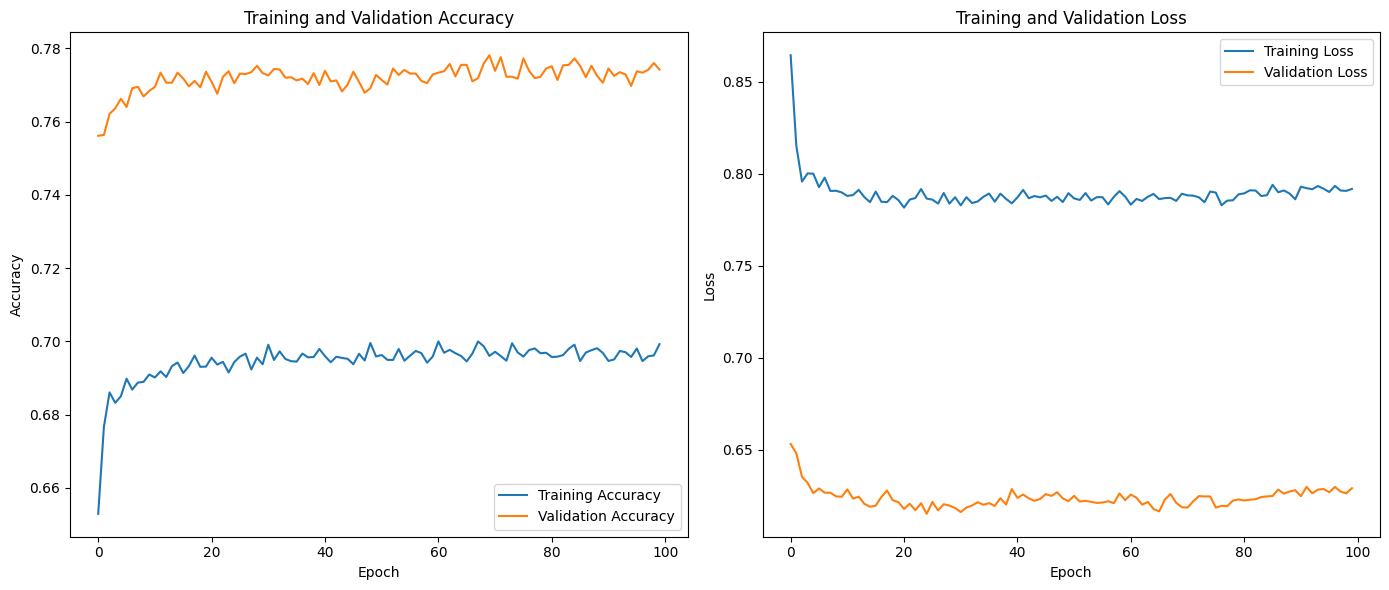

Test Set Accuracy: 0.7674
Test Set Loss: 0.6272


In [196]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('base_train.csv')  # Replace with the correct path to your file

# Extract the features (x columns) and the target (y column)
X = data.drop(columns=['Event']).values  # Assuming all columns except 'y' are features
y = data['Event'].values  # This is the target column

# Encode the target variable (y) to ensure it's numeric
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape X for LSTM input: [samples, timesteps, features]
# Assuming each row is a timestep in a sequence
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X_reshaped, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Further split the temporary set into validation (50% of the temporary set) and testing (50%)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Build the LSTM model with Dropout and RMSprop optimizer
model = Sequential()
model.add(Dropout(0.4))
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2]), activation='tanh'))
model.add(Dropout(0.3))  # Dropout layer to reduce overfitting
model.add(Dense(50, activation='tanh'))
model.add(Dropout(0.3))  # Additional dropout layer
model.add(Dense(13, activation='tanh'))
model.add(Dropout(0.1))  # Additional dropout layer
model.add(Dense(len(np.unique(y_encoded)), activation='softmax'))  # Output layer for classification

# Compile the model with RMSprop optimizer
optimizer = RMSprop(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=100, batch_size=32, verbose=1)

# Plotting training & validation accuracy
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plotting training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Set Accuracy: {test_accuracy:.4f}")
print(f"Test Set Loss: {test_loss:.4f}")


Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


640/640 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5103 - loss: 1.1490 - val_accuracy: 0.7368 - val_loss: 0.7090
Epoch 2/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7143 - loss: 0.7360 - val_accuracy: 0.7505 - val_loss: 0.6453
Epoch 3/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7296 - loss: 0.6951 - val_accuracy: 0.7595 - val_loss: 0.6272
Epoch 4/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7367 - loss: 0.6804 - val_accuracy: 0.7639 - val_loss: 0.6189
Epoch 5/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7415 - loss: 0.6713 - val_accuracy: 0.7655 - val_loss: 0.6126
Epoch 6/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7403 - loss: 0.6647 - val_accuracy: 0.7690 - val_loss: 0.6073
Epoch 7/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7462 - loss: 0.6560 - val_accuracy: 0.7690 - val_loss: 0.6034
Epoch 8/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7523 - loss: 0.6431 - val_accuracy: 0.7704

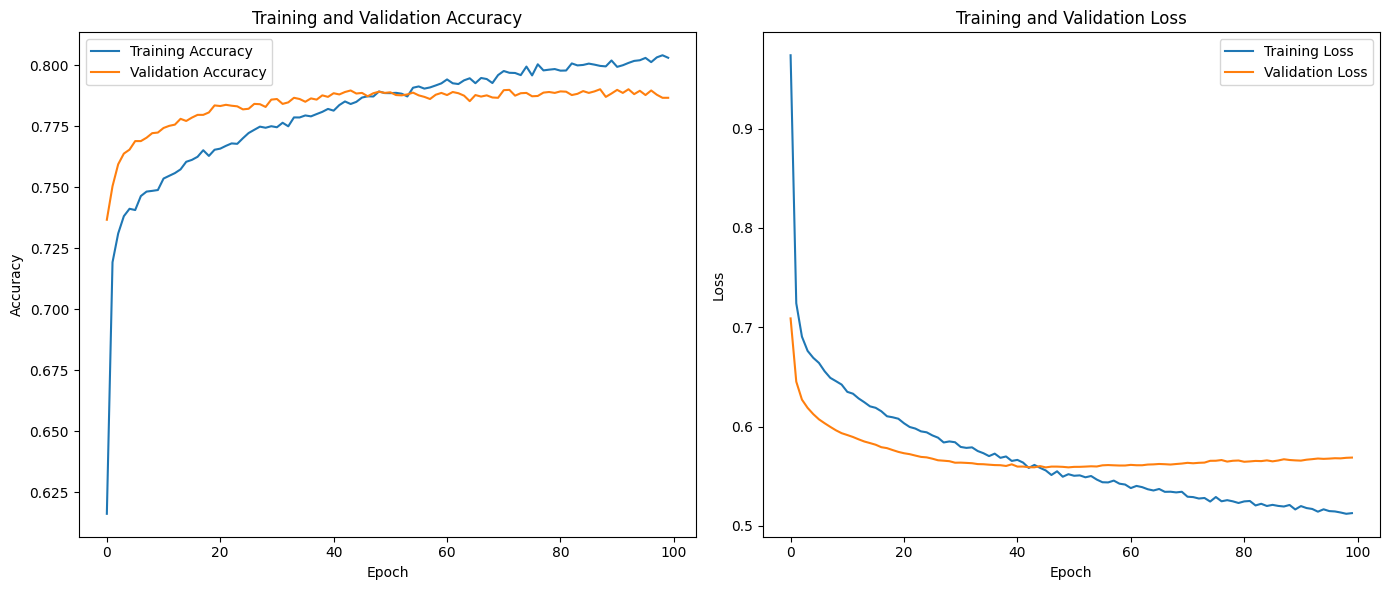

Test Set Accuracy: 0.7894
Test Set Loss: 0.5632


In [197]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('base_train.csv')  # Replace with the correct path to your file

# Extract the features (x columns) and the target (y column)
X = data.drop(columns=['Event']).values  # Assuming all columns except 'y' are features
y = data['Event'].values  # This is the target column

# Encode the target variable (y) to ensure it's numeric
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape X for LSTM input: [samples, timesteps, features]
# Assuming each row is a timestep in a sequence
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X_reshaped, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Further split the temporary set into validation (50% of the temporary set) and testing (50%)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Build the LSTM model with Dropout and RMSprop optimizer
model = Sequential()
model.add(Dropout(0.1))
model.add(LSTM(145, input_shape=(X_train.shape[1], X_train.shape[2]), activation='tanh'))
model.add(Dropout(0.3))  # Dropout layer to reduce overfitting
model.add(Dense(70, activation='tanh'))
model.add(Dropout(0.2))  # Additional dropout layer

model.add(Dense(13, activation='tanh'))
model.add(Dropout(0.1))  # Additional dropout layer
model.add(Dense(len(np.unique(y_encoded)), activation='softmax'))  # Output layer for classification

# Compile the model with RMSprop optimizer
optimizer = RMSprop(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=100, batch_size=100, verbose=1)

# Plotting training & validation accuracy
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plotting training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Set Accuracy: {test_accuracy:.4f}")
print(f"Test Set Loss: {test_loss:.4f}")


Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5008 - loss: 1.1475 - val_accuracy: 0.7360 - val_loss: 0.7117
Epoch 2/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7041 - loss: 0.7619 - val_accuracy: 0.7554 - val_loss: 0.6494
Epoch 3/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7257 - loss: 0.7138 - val_accuracy: 0.7588 - val_loss: 0.6313
Epoch 4/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7269 - loss: 0.7049 - val_accuracy: 0.7636 - val_loss: 0.6215
Epoch 5/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7346 - loss: 0.6881 - val_accuracy: 0.7675 - val_loss: 0.6136
Epoch 6/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7368 - loss: 0.6828 - val_accuracy: 0.7678 - val_loss: 0.6098
Epoch 7/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7408 - loss: 0.6737 - val_accuracy: 0.7690 - val_loss: 0.6063
Epoch 8/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7436 - loss: 0.6683 - val_accuracy: 0.7697

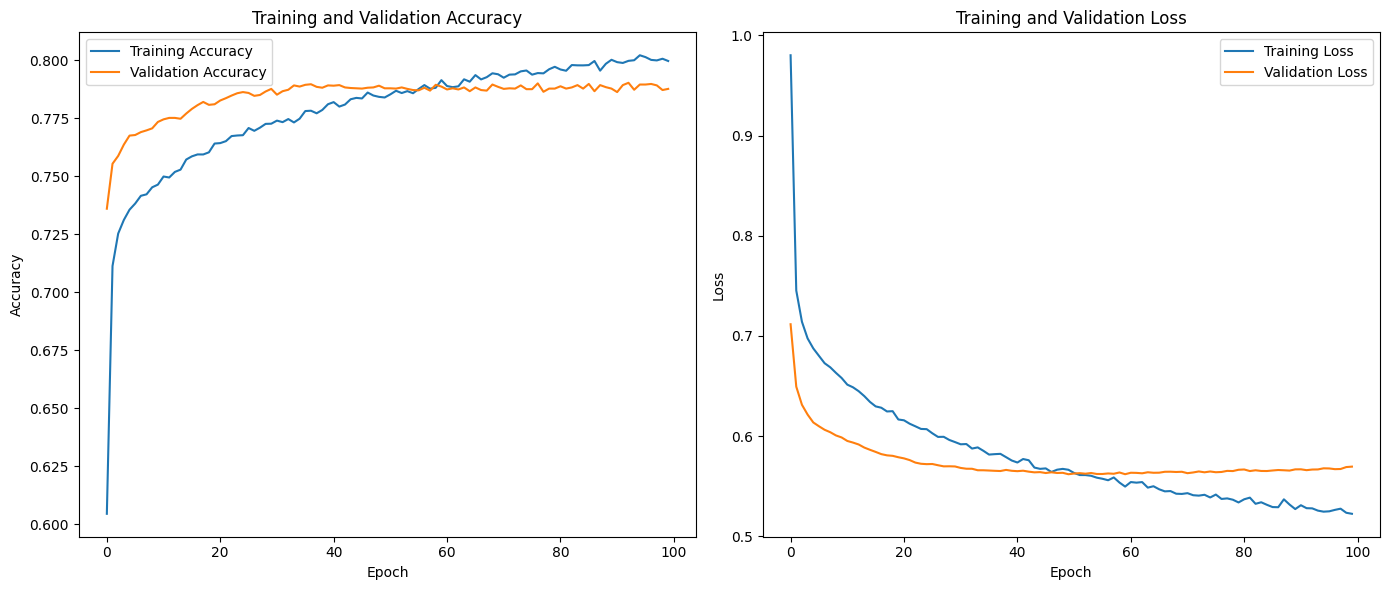

Test Set Accuracy: 0.7885
Test Set Loss: 0.5681


In [199]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('base_train.csv')  # Replace with the correct path to your file

# Extract the features (x columns) and the target (y column)
X = data.drop(columns=['Event']).values  # Assuming all columns except 'y' are features
y = data['Event'].values  # This is the target column

# Encode the target variable (y) to ensure it's numeric
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape X for LSTM input: [samples, timesteps, features]
# Assuming each row is a timestep in a sequence
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X_reshaped, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Further split the temporary set into validation (50% of the temporary set) and testing (50%)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Build the LSTM model with Dropout and RMSprop optimizer
model = Sequential()
model.add(Dropout(0.1))
model.add(LSTM(145, input_shape=(X_train.shape[1], X_train.shape[2]), activation='tanh'))
model.add(Dropout(0.3))  # Dropout layer to reduce overfitting
model.add(Dense(70, activation='tanh'))
model.add(Dropout(0.2))  # Additional dropout layer
model.add(Dense(33,activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(13, activation='tanh'))
model.add(Dropout(0.1))  # Additional dropout layer
model.add(Dense(len(np.unique(y_encoded)), activation='softmax'))  # Output layer for classification

# Compile the model with RMSprop optimizer
optimizer = RMSprop(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=100, batch_size=100, verbose=1)

# Plotting training & validation accuracy
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plotting training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Set Accuracy: {test_accuracy:.4f}")
print(f"Test Set Loss: {test_loss:.4f}")


Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


560/560 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4257 - loss: 1.2547 - val_accuracy: 0.7186 - val_loss: 0.7992
Epoch 2/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6874 - loss: 0.8232 - val_accuracy: 0.7456 - val_loss: 0.6706
Epoch 3/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7214 - loss: 0.7365 - val_accuracy: 0.7552 - val_loss: 0.6443
Epoch 4/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7245 - loss: 0.7183 - val_accuracy: 0.7605 - val_loss: 0.6304
Epoch 5/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7318 - loss: 0.7031 - val_accuracy: 0.7636 - val_loss: 0.6219
Epoch 6/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7360 - loss: 0.6896 - val_accuracy: 0.7661 - val_loss: 0.6148
Epoch 7/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7360 - loss: 0.6907 - val_accuracy: 0.7689 - val_loss: 0.6103
Epoch 8/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7397 - loss: 0.6793 - val_accuracy: 0.7685

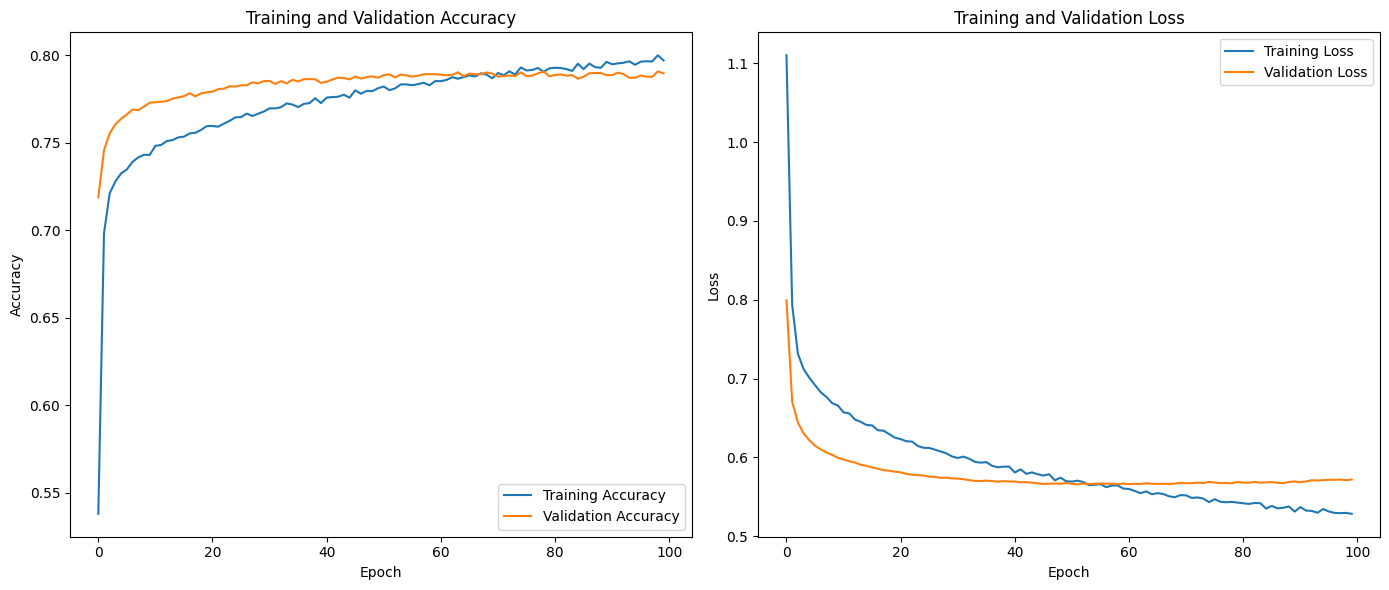

Test Set Accuracy: 0.7906
Test Set Loss: 0.5568


In [236]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('base_train.csv')  # Replace with the correct path to your file

# Extract the features (x columns) and the target (y column)
X = data.drop(columns=['Event']).values  # Assuming all columns except 'y' are features
y = data['Event'].values  # This is the target column

# Encode the target variable (y) to ensure it's numeric
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape X for LSTM input: [samples, timesteps, features]
# Assuming each row is a timestep in a sequence
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X_reshaped, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

# Further split the temporary set into validation (50% of the temporary set) and testing (50%)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.3, random_state=42, stratify=y_temp)

# Build the LSTM model with Dropout and RMSprop optimizer
model = Sequential()
model.add(Dropout(0.1))
model.add(LSTM(135, input_shape=(X_train.shape[1], X_train.shape[2]), activation='tanh'))
model.add(Dropout(0.3))  # Dropout layer to reduce overfitting
model.add(Dense(70, activation='tanh'))
model.add(Dropout(0.2))  # Additional dropout layer
model.add(Dense(40,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(13, activation='tanh'))
model.add(Dropout(0.1))  # Additional dropout layer
model.add(Dense(len(np.unique(y_encoded)), activation='softmax'))  # Output layer for classification

# Compile the model with RMSprop optimizer
optimizer = RMSprop(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=100, batch_size=100, verbose=1)

# Plotting training & validation accuracy
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plotting training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Set Accuracy: {test_accuracy:.4f}")
print(f"Test Set Loss: {test_loss:.4f}")


Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


560/560 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4180 - loss: 1.2663 - val_accuracy: 0.7162 - val_loss: 0.8131
Epoch 2/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6796 - loss: 0.8438 - val_accuracy: 0.7437 - val_loss: 0.6832
Epoch 3/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7092 - loss: 0.7634 - val_accuracy: 0.7530 - val_loss: 0.6561
Epoch 4/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7196 - loss: 0.7347 - val_accuracy: 0.7576 - val_loss: 0.6429
Epoch 5/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7243 - loss: 0.7210 - val_accuracy: 0.7599 - val_loss: 0.6358
Epoch 6/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7281 - loss: 0.7098 - val_accuracy: 0.7651 - val_loss: 0.6291
Epoch 7/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7356 - loss: 0.6937 - val_accuracy: 0.7655 - val_loss: 0.6250
Epoch 8/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7349 - loss: 0.6974 - val_accuracy: 0.7658

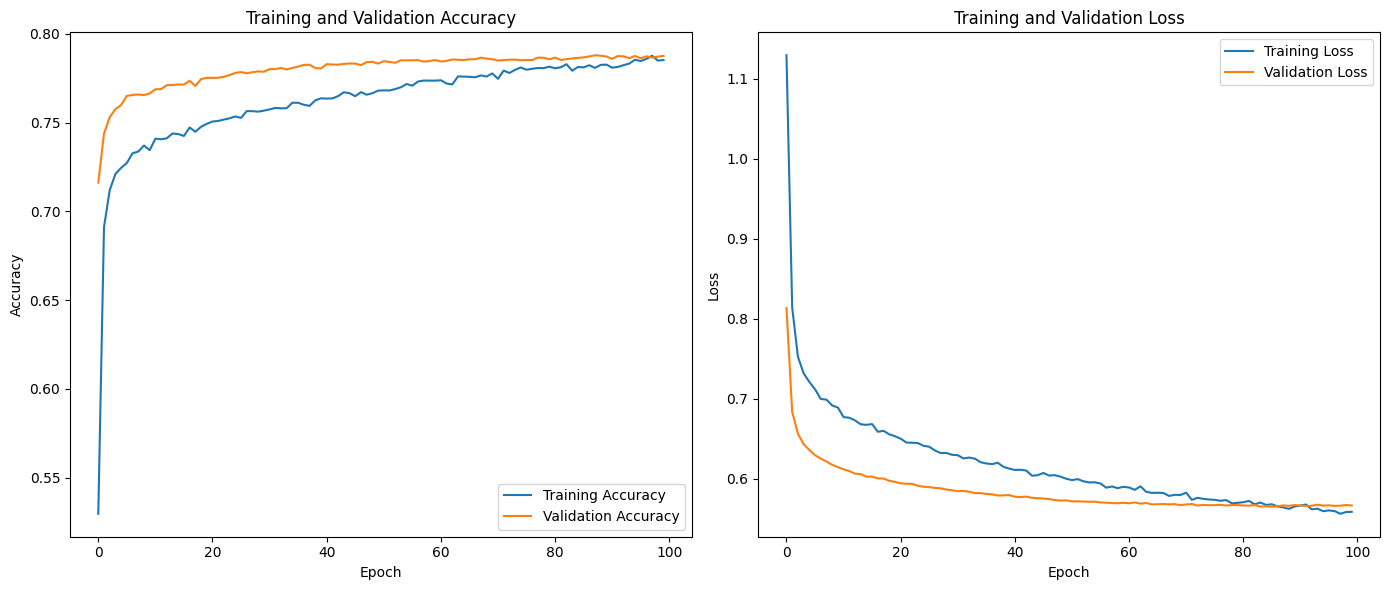

Test Set Accuracy: 0.7924
Test Set Loss: 0.5544


In [237]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('base_train.csv')  # Replace with the correct path to your file

# Extract the features (x columns) and the target (y column)
X = data.drop(columns=['Event']).values  # Assuming all columns except 'Event' are features
y = data['Event'].values  # This is the target column

# Encode the target variable (y) to ensure it's numeric
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape X for GRU input: [samples, timesteps, features]
# Assuming each row is a timestep in a sequence
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split the dataset into training (70%) and testing (30%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X_reshaped, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

# Further split the temporary set into validation (50% of the temporary set) and testing (50%)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.3, random_state=42, stratify=y_temp)

# Build the GRU model with Dropout and RMSprop optimizer
model = Sequential()
model.add(Dropout(0.1))
model.add(GRU(135, input_shape=(X_train.shape[1], X_train.shape[2]), activation='tanh', return_sequences=False))
model.add(Dropout(0.3))  # Dropout layer to reduce overfitting
model.add(Dense(70, activation='tanh'))
model.add(Dropout(0.2))  # Additional dropout layer
model.add(Dense(40, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(13, activation='tanh'))
model.add(Dropout(0.1))  # Additional dropout layer
model.add(Dense(len(np.unique(y_encoded)), activation='softmax'))  # Output layer for classification

# Compile the model with RMSprop optimizer
optimizer = RMSprop(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=100, batch_size=100, verbose=1)

# Plotting training & validation accuracy
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plotting training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Set Accuracy: {test_accuracy:.4f}")
print(f"Test Set Loss: {test_loss:.4f}")


Epoch 1/300


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2105 - loss: 1.5353 - val_accuracy: 0.2252 - val_loss: 1.4623
Epoch 2/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2468 - loss: 1.4661 - val_accuracy: 0.2757 - val_loss: 1.3981
Epoch 3/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2959 - loss: 1.4019 - val_accuracy: 0.3319 - val_loss: 1.3400
Epoch 4/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3416 - loss: 1.3426 - val_accuracy: 0.3931 - val_loss: 1.2867
Epoch 5/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3697 - loss: 1.3094 - val_accuracy: 0.4540 - val_loss: 1.2385
Epoch 6/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4195 - loss: 1.2605 - val_accuracy: 0.5083 - val_loss: 1.1936
Epoch 7/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4600 - loss: 1.2202 - val_accuracy: 0.5521 - val_loss: 1.1526
Epoch 8/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4892 - loss: 1.1860 - val_accuracy: 0.5707 - val_loss: 1.1

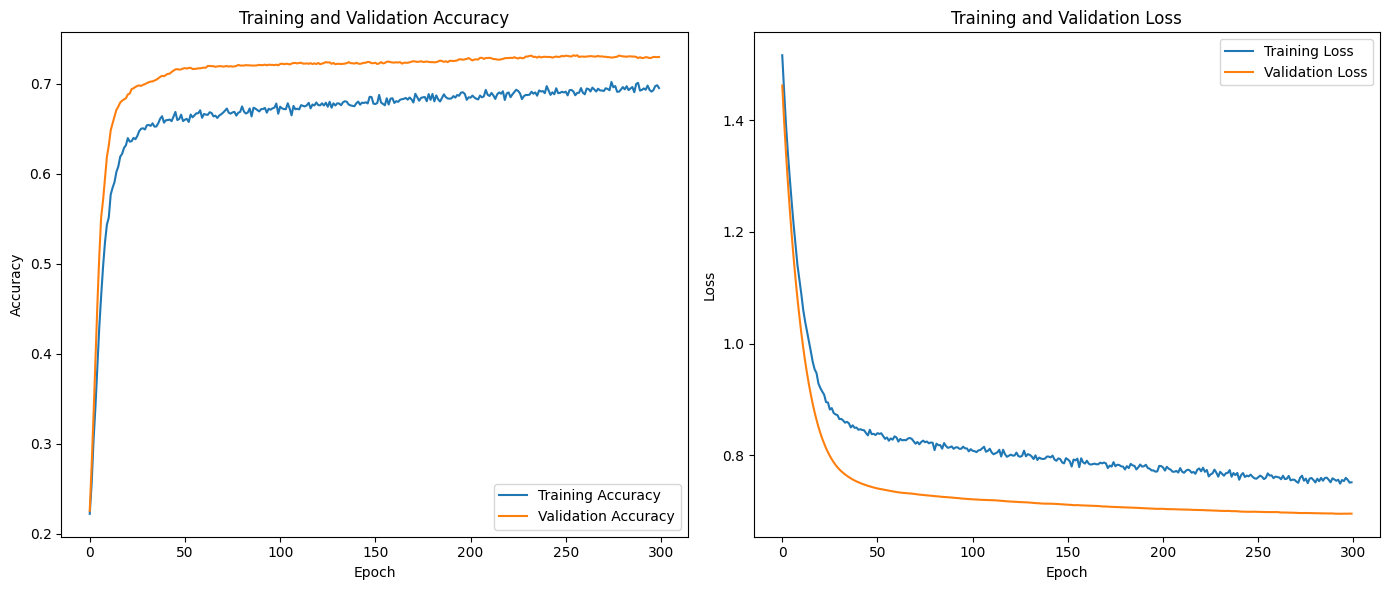

Test Set Accuracy: 0.7411
Test Set Loss: 0.7050


In [277]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt

# Load the dataset
data =real_df  # Replace with the correct path to your file

# Extract the features (x columns) and the target (y column)
X = data.drop(columns=['Event']).values  # Assuming all columns except 'Event' are features
y = data['Event'].values  # This is the target column

# Encode the target variable (y) to ensure it's numeric
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape X for GRU input: [samples, timesteps, features]
# Assuming each row is a timestep in a sequence
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split the dataset into training (70%) and testing (30%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X_reshaped, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

# Further split the temporary set into validation (50% of the temporary set) and testing (50%)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.3, random_state=42, stratify=y_temp)

# Build the GRU model with Dropout and RMSprop optimizer
model = Sequential()
model.add(Dropout(0.2))
model.add(GRU(50, input_shape=(X_train.shape[1], X_train.shape[2]), activation='tanh', return_sequences=False))
model.add(Dropout(0.1))  # Dropout layer to reduce overfitting
# model.add(Dense(70, activation='tanh'))
# model.add(Dropout(0.2))  # Additional dropout layer
# model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(13, activation='tanh'))
model.add(Dropout(0.1))  # Additional dropout layer
model.add(Dense(len(np.unique(y_encoded)), activation='softmax'))  # Output layer for classification

# Compile the model with RMSprop optimizer
optimizer = RMSprop(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=300, batch_size=400, verbose=1)

# Plotting training & validation accuracy
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plotting training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Set Accuracy: {test_accuracy:.4f}")
print(f"Test Set Loss: {test_loss:.4f}")


Epoch 1/150


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


560/560 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4162 - loss: 1.2612 - val_accuracy: 0.7097 - val_loss: 0.7941
Epoch 2/150
560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6683 - loss: 0.8542 - val_accuracy: 0.7433 - val_loss: 0.6882
Epoch 3/150
560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7012 - loss: 0.7706 - val_accuracy: 0.7572 - val_loss: 0.6552
Epoch 4/150
560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7145 - loss: 0.7399 - val_accuracy: 0.7615 - val_loss: 0.6404
Epoch 5/150
560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7242 - loss: 0.7231 - val_accuracy: 0.7658 - val_loss: 0.6318
Epoch 6/150
560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7225 - loss: 0.7171 - val_accuracy: 0.7666 - val_loss: 0.6248
Epoch 7/150
560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7314 - loss: 0.6997 - val_accuracy: 0.7677 - val_loss: 0.6206
Epoch 8/150
560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7337 - loss: 0.6955 - val_accuracy: 0.7684

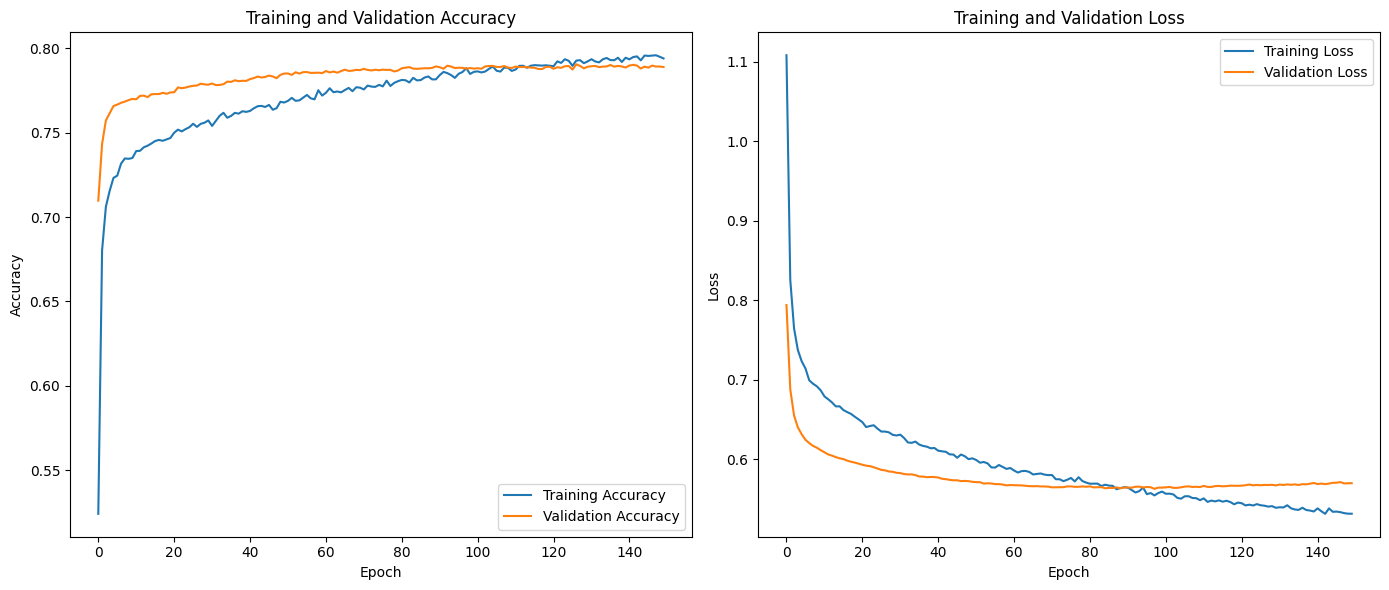

Test Set Accuracy: 0.7908
Test Set Loss: 0.5548


In [283]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('base_train.csv')  # Replace with the correct path to your file

# Extract the features (x columns) and the target (y column)
X = data.drop(columns=['Event']).values  # Assuming all columns except 'Event' are features
y = data['Event'].values  # This is the target column

# Encode the target variable (y) to ensure it's numeric
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape X for GRU input: [samples, timesteps, features]
# Assuming each row is a timestep in a sequence
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split the dataset into training (70%) and testing (30%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X_reshaped, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

# Further split the temporary set into validation (50% of the temporary set) and testing (50%)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.3, random_state=42, stratify=y_temp)

# Build the GRU model with Dropout and RMSprop optimizer
model = Sequential()
model.add(Dropout(0.1))
model.add(GRU(135, input_shape=(X_train.shape[1], X_train.shape[2]), activation='tanh', return_sequences=False))
model.add(Dropout(0.3))  # Dropout layer to reduce overfitting
model.add(Dense(70, activation='tanh'))
model.add(Dropout(0.2))  # Additional dropout layer
model.add(Dense(40, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(13, activation='tanh'))
model.add(Dropout(0.1))  # Additional dropout layer
model.add(Dense(len(np.unique(y_encoded)), activation='softmax'))  # Output layer for classification

# Compile the model with RMSprop optimizer
optimizer = RMSprop(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=150, batch_size=100, verbose=1)

# Plotting training & validation accuracy
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plotting training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Set Accuracy: {test_accuracy:.4f}")
print(f"Test Set Loss: {test_loss:.4f}")


Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


427/427 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4355 - loss: 1.2264 - val_accuracy: 0.7239 - val_loss: 0.7753
Epoch 2/100
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6857 - loss: 0.8242 - val_accuracy: 0.7473 - val_loss: 0.6745
Epoch 3/100
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7159 - loss: 0.7474 - val_accuracy: 0.7530 - val_loss: 0.6476
Epoch 4/100
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7222 - loss: 0.7309 - val_accuracy: 0.7582 - val_loss: 0.6367
Epoch 5/100
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7286 - loss: 0.7139 - val_accuracy: 0.7604 - val_loss: 0.6273
Epoch 6/100
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7269 - loss: 0.7057 - val_accuracy: 0.7621 - val_loss: 0.6228
Epoch 7/100
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7350 - loss: 0.6950 - val_accuracy: 0.7617 - val_loss: 0.6176
Epoch 8/100
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7349 - loss: 0.6943 - val_accuracy: 0.7670

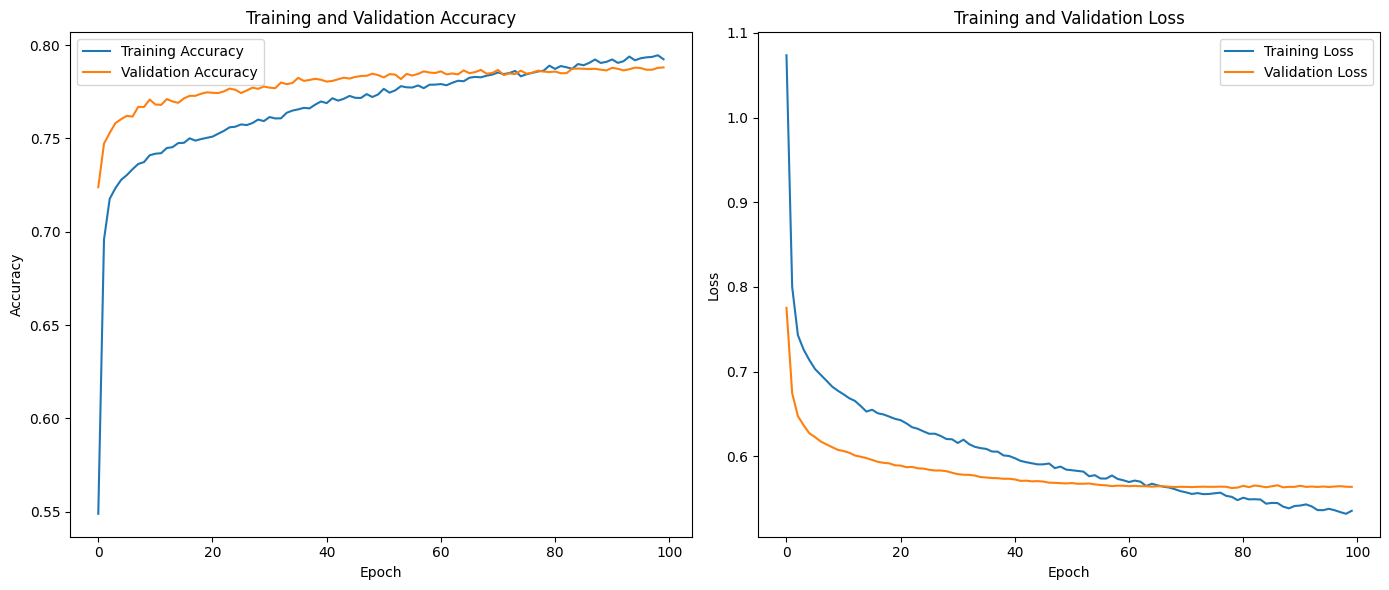

Test Set Accuracy: 0.7916
Test Set Loss: 0.5548


In [288]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, GRU, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('base_train.csv')  # Replace with the correct path to your file

# Extract the features (x columns) and the target (y column)
X = data.drop(columns=['Event']).values  # Assuming all columns except 'Event' are features
y = data['Event'].values  # This is the target column

# Encode the target variable (y) to ensure it's numeric
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape X for GRU input: [samples, timesteps, features]
# Assuming each row is a timestep in a sequence
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split the dataset into training (70%) and testing (30%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X_reshaped, y_encoded, test_size=0.20, random_state=42, stratify=y_encoded)

# Further split the temporary set into validation (50% of the temporary set) and testing (50%)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Build the Bidirectional GRU model with Dropout and RMSprop optimizer
model = Sequential()
model.add(Dropout(0.1))
model.add(Bidirectional(GRU(135, activation='tanh'), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.3))  # Dropout layer to reduce overfitting
model.add(Dense(70, activation='tanh'))
model.add(Dropout(0.2))  # Additional dropout layer
model.add(Dense(40, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(13, activation='tanh'))
model.add(Dropout(0.1))  # Additional dropout layer
model.add(Dense(len(np.unique(y_encoded)), activation='softmax'))  # Output layer for classification

# Compile the model with RMSprop optimizer
optimizer = RMSprop(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=100, batch_size=150, verbose=1)

# Plotting training & validation accuracy
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plotting training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Set Accuracy: {test_accuracy:.4f}")
print(f"Test Set Loss: {test_loss:.4f}")


In [291]:
pip install transformers torch



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [293]:
pip install tf_keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 4.6 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [294]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
import torch

In [301]:
# prompt: load real.csv and replace event 4 with 3 and remove Commentary column

import pandas as pd
import numpy as np
# Load the CSV file
df = pd.read_csv('base_train.csv')

# Replace event 4 with 3
df['Event'] = df['Event'].replace(4, 3)



In [302]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming your data is in a DataFrame called 'df' and 'Event' is the target variable
y = df['Event']
X = df.drop('Event', axis=1)

# 1. Data Preprocessing (example with StandardScaler)
scaler = StandardScaler()
X = scaler.fit_transform(X)  

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Hyperparameter Tuning with GridSearchCV
param_grid = {
    'n_estimators': [70, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_classifier = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5) 
grid_search.fit(X_train, y_train)

best_rf_classifier = grid_search.best_estimator_

# 4. Train and Evaluate the model
best_rf_classifier.fit(X_train, y_train)
y_pred = best_rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.77175


In [310]:
pip3 install libomp


SyntaxError: invalid syntax (3301560549.py, line 1)

In [311]:
pip install xgboost


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [312]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Assuming your data is in a DataFrame called 'df' and 'Event' is the target variable
y = df['Event']
X = df.drop('Event', axis=1)

# 1. Data Preprocessing (Scaling)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Hyperparameter Tuning with GridSearchCV
param_grid = {
    'n_estimators': [70, 100, 150],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.001],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

xgb_classifier = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# 4. Select the best model
best_xgb_classifier = grid_search.best_estimator_

# 5. Train and Evaluate the model
best_xgb_classifier.fit(X_train, y_train)
y_pred = best_xgb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.